# DOO

In [1]:
import numpy as np # for sampling points
import sys # necessary for local path. If you install the library, it can be removed
sys.path.append('..') 
import lipschitz_opt
import matplotlib.pyplot as plt # visualization
from ipywidgets import interact, widgets # for playing with the hyperparameters on the functions

In [2]:
from lipschitz_opt.application import Func1D_0, Func1D_composite

In [3]:
from lipschitz_opt import doo

Text(0.5, 1.0, 'f(x)= 1.0-1.0*|x-0.5|^1.0 for 0.0<=x<=1.0')

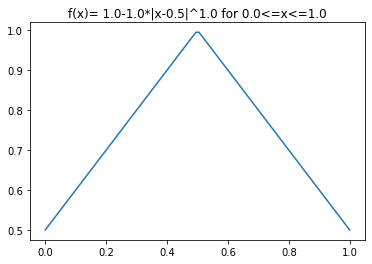

In [4]:
# create the function

f = Func1D_0(a=0.5)
x = np.linspace(f.x_min, f.x_max, 100) # samples for visualization
y =f(x) # output

plt.plot(x, y)
plt.title('f(x)= {}-{}*|x-{}|^{} for {}<=x<={}'.format(f.d, f.c, f.a, f.b, f.x_min, f.x_max))

In [44]:
def plot_doo(f, nb_split, maximize=True):
    results = doo(f.x_min, f.x_max, f, f.lipschitz(), p=np.inf, maximize=maximize, max_iter=nb_split)
    opt = results[0]
    x = np.linspace(f.x_min, f.x_max, 100) # samples for visualization
    y = f(x)
    plt.plot(x, y)
    plt.plot(x, opt*np.ones_like(x))
    if maximize:
        plt.title('f(x)<={}'.format(max(opt)))
    else:
        plt.title('f(x>={}'.format(max(opt)))
    
    x_=[]
    y_=[]
    for node in results[1]:
        plt.plot([node.box.x_min, node.box.x_max], [node.value, node.value], '--', c='k')

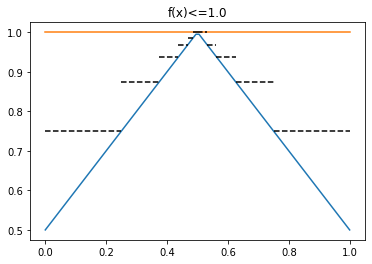

In [45]:
plot_doo(f, 10)

In [46]:
f_0 = Func1D_0(a=0.25, c=1.)
f_1 = Func1D_0(a=0.75, b=2, c=0.6)
f_2 = Func1D_composite([f_0,f_1], op='max')



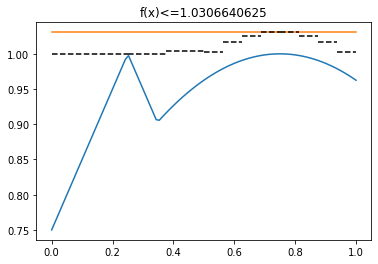

In [53]:
plot_doo(f_2, 10)

In [49]:
# interact function

In [54]:
def frame(n_iter, maximize=1):
    if maximize==1:
        maximize=True
    else:
        maximize=False
    plot_doo(f_2, n_iter, maximize=maximize)
    
interact(frame,
        n_iter = widgets.IntSlider(value=1, min=1, max=100, step=1, continuous_update=False),
        maximize = widgets.IntSlider(value=1, min=0, max=1, step=1, continuous_update=False)
        )

interactive(children=(IntSlider(value=1, continuous_update=False, description='n_iter', min=1), IntSlider(valu…

<function __main__.frame(n_iter, maximize=1)>